In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("sales_data_with_discounts.csv")

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB
None


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

stats_df = df[numerical_cols].describe().T

modes = df[numerical_cols].mode().iloc[0]
stats_df['mode'] = modes

stats_df = stats_df.round(2)

display(stats_df)


,count,mean,std,min,25%,50%,75%,max,mode
Volume,450.0,5.07,4.23,1.00,3.00,4.00,6.00,31.00,3.00
Avg Price,450.0,10453.43,18079.90,290.00,465.00,1450.00,10100.00,60100.00,400.00
Total Sales Value,450.0,33812.84,50535.07,400.00,2700.00,5700.00,53200.00,196400.00,24300.00
Discount Rate (%),450.0,15.16,4.22,5.01,13.97,16.58,18.11,19.99,5.01
Discount Amount,450.0,3346.50,4509.90,69.18,460.46,988.93,5316.50,25738.02,69.18
Net Sales Value,450.0,30466.34,46358.66,326.97,2202.21,4677.79,47847.91,179507.48,326.97


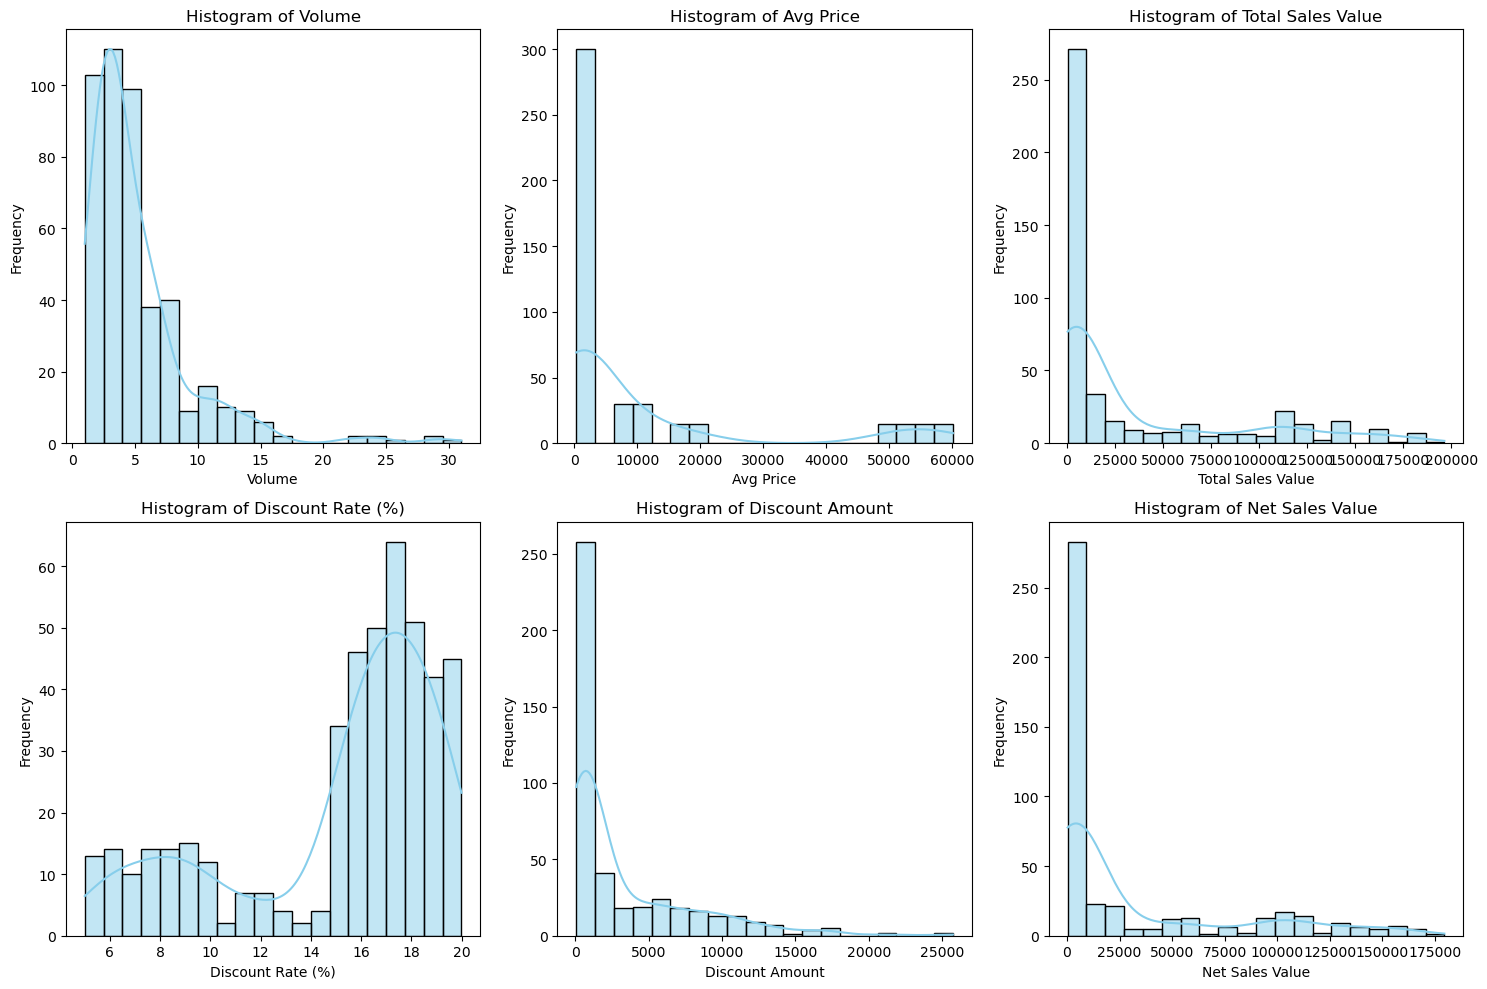

In [9]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

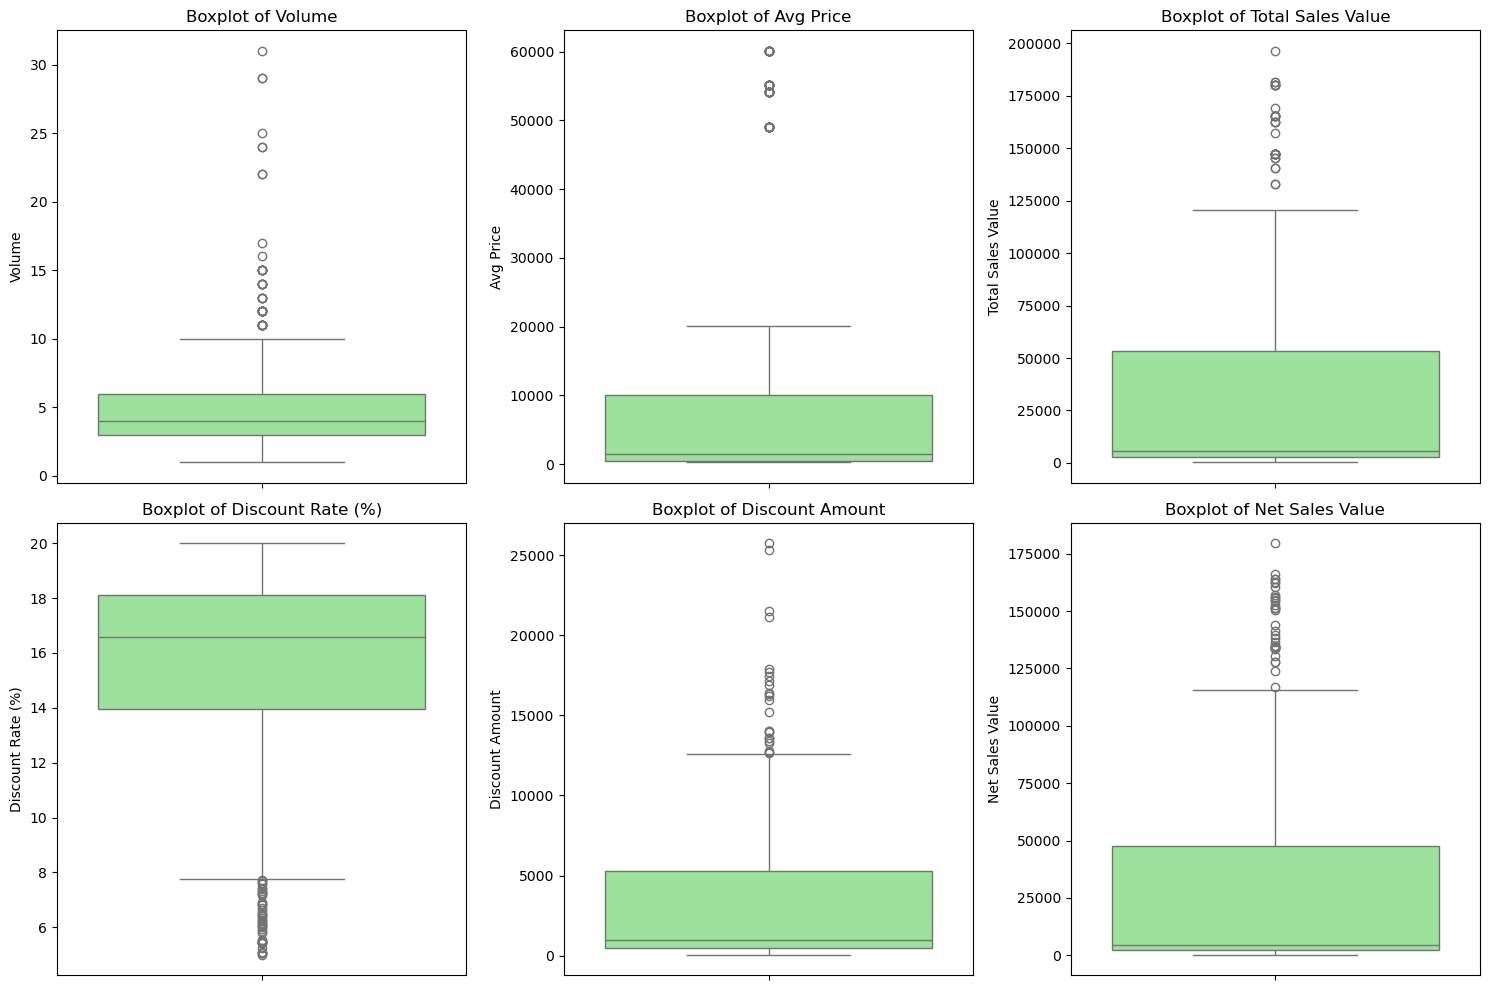

In [10]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

C:\Users\C2IN\AppData\Local\Temp\ipykernel_2180\3886622913.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="pastel")
C:\Users\C2IN\AppData\Local\Temp\ipykernel_2180\3886622913.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="pastel")
C:\Users\C2IN\AppData\Local\Temp\ipykernel_2180\3886622913.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="pastel")
C:\Users\C2IN\AppData\Local\Temp\ipykernel_2180\3886622913.py:6: FutureWarning: 

Passing `palette` without assigning `hu

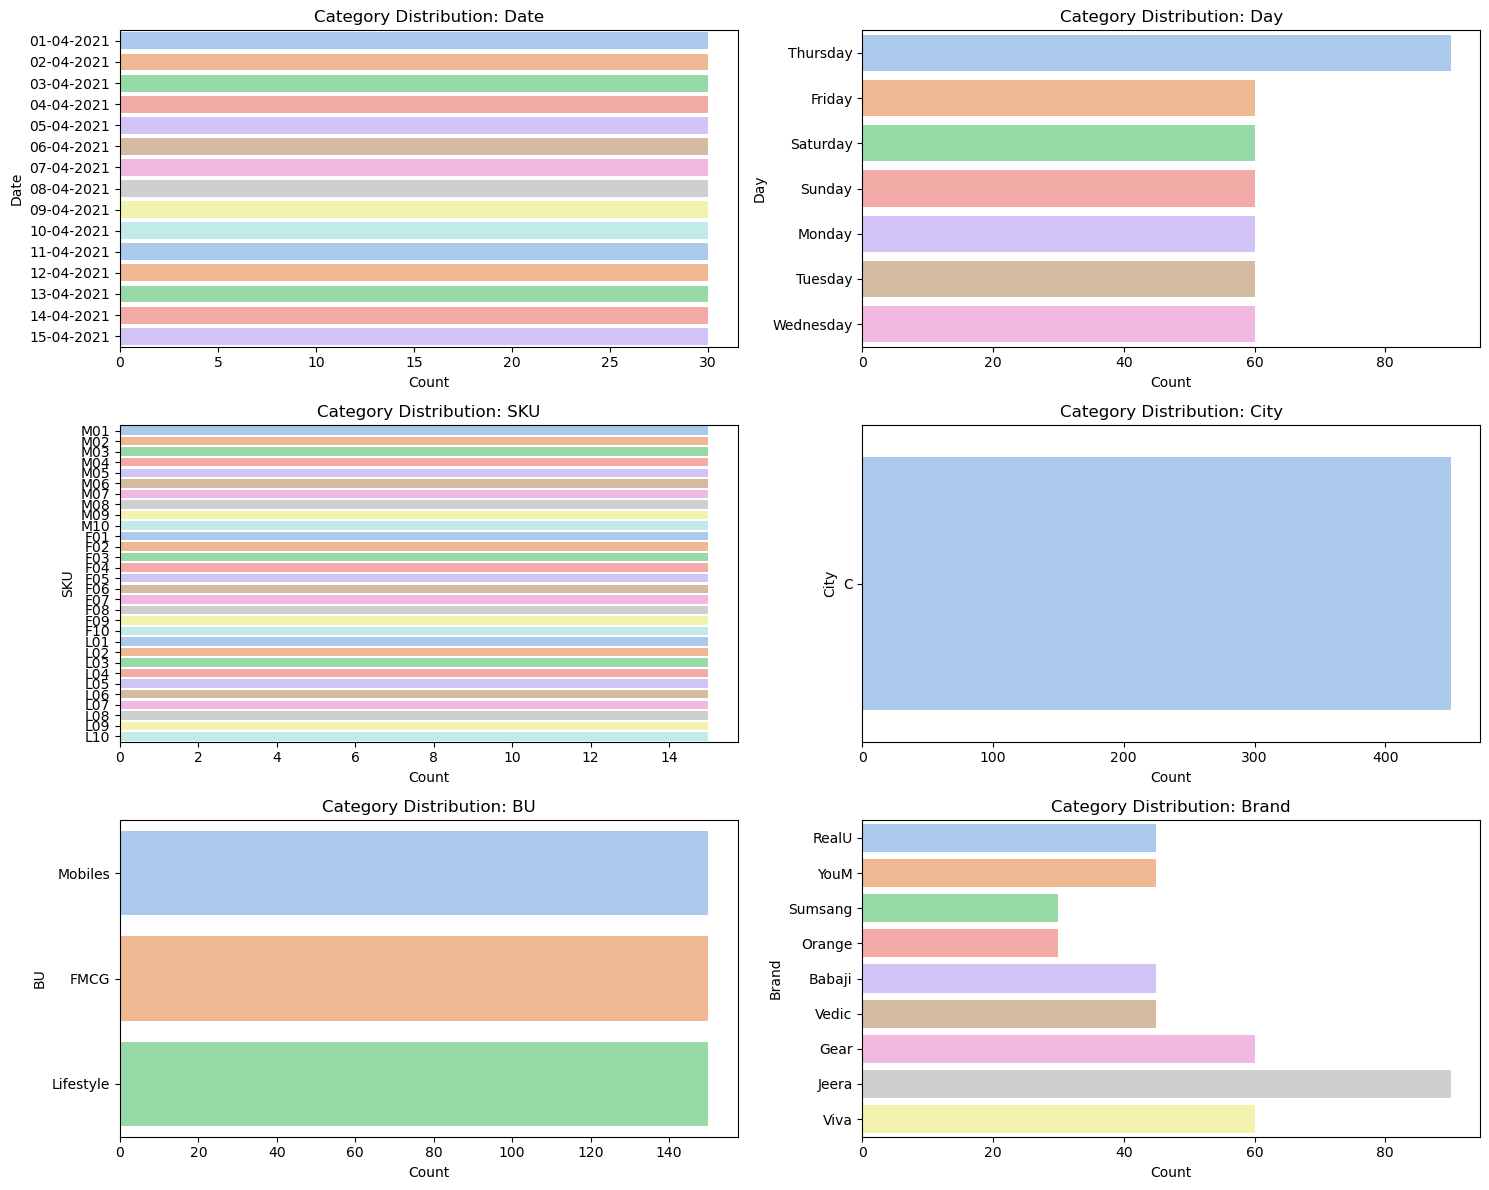

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

plt.figure(figsize=(15,12))
for i, col in enumerate(categorical_cols[:6]):  # limit to first few
    plt.subplot(3, 2, i+1)
    sns.countplot(y=df[col], palette="pastel")
    plt.title(f"Category Distribution: {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [12]:
print("Summary Insights:\n")
print("- Dataset has", len(df), "records and", len(df.columns), "columns.")
print("- Numerical columns analyzed:", numerical_cols)
print("- Categorical columns visualized:", categorical_cols)
print("\nUse these visuals to identify skewness, outliers, and distribution patterns for further preprocessing.")


Summary Insights:

- Dataset has 450 records and 13 columns.
- Numerical columns analyzed: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
- Categorical columns visualized: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

Use these visuals to identify skewness, outliers, and distribution patterns for further preprocessing.
